Specify image dimensions 100 x 100
Specify permutation type (low_level or template) template
Specify template shape, colour, dimensions or radius and starting locus circle blue 10 50 x 50


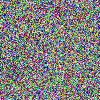

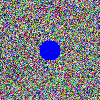

In [29]:
import os
import time

import math
import numpy
from PIL import Image

image_dataset = []

#Create Random Image functionality credited to https://gist.github.com/sparkstar/c6bff470e84912566113
def create_image(width = 1920, height = 1080, num_of_images = 100):
    width = int(width)
    height = int(height)
    num_of_images = int(num_of_images)
 
    #current = time.strftime("%Y%m%d%H%M%S")
    #os.mkdir(current)
 
    for n in range(num_of_images):
        #filename = '{0}/{0}_{1:03d}.jpg'.format(current, n)
        rgb_array = numpy.random.rand(height,width,3) * 255
        image = Image.fromarray(rgb_array.astype('uint8')).convert('RGB')
        #image.save(filename)
        image_dataset.append(image)

def template_permutation(specified_image_dimensions):
    
    image_dimension_numbers = []
    for word in specified_image_dimensions.split():
        if word.isdigit():
            image_dimension_numbers.append(int(word))
    
    R_value = -1
    G_value = -1
    B_value = -1
    
    template_details = input('Specify template shape, colour, dimensions or radius and starting locus ')
    template_details = template_details.split()
    

    if template_details[1] == 'yellow':
        R_value = 255
        G_value = 255
        B_value = 0
    
    if template_details[1] == 'red':
        R_value = 255
        G_value = 0
        B_value = 0
        
    if template_details[1] == 'green':
        R_value = 0
        G_value = 255
        B_value = 0
    
    if template_details[1] == 'blue':
        R_value = 0
        G_value = 0
        B_value = 255
        
    if template_details[1] == 'orange':
        R_value = 255
        G_value = 165
        B_value = 0
    
    if template_details[1] == 'indigo':
        R_value = 75
        G_value = 0
        B_value = 130
        
    if template_details[1] == 'violet':
        R_value = 238
        G_value = 130
        B_value = 238
        
    if ((template_details[0] == "square") or (template_details[0] == "rectangle")):
        
        template_locus = template_details[5] + " " + template_details[6] + " " + template_details[7]
        template_locus_numbers = []
        for word in template_locus.split():
            if word.isdigit():
                template_locus_numbers.append(int(word))
        
        #get square dimensions - compare with dimensions of image
        template_dimensions = template_details[2] +" "+ template_details[3] +" "+ template_details[4]
        template_dimension_numbers = []
        
        for word in template_dimensions.split():
            if word.isdigit():
                template_dimension_numbers.append(int(word))
    
        if ((image_dimension_numbers[0] < template_dimension_numbers[0]) or (image_dimension_numbers[1] < template_dimension_numbers[1])):
            print("Error - template dimensions are greater than image dimensions!")
            
        elif ((template_locus_numbers[0]+template_dimension_numbers[0]>image_dimension_numbers[0]) or (template_locus_numbers[1]+template_dimension_numbers[1]>image_dimension_numbers[1])):
            print("Error - template dimensions are too great for indicated starting locus")
        
        else:
            #carry out permutation
            
            create_image(image_dimension_numbers[0], image_dimension_numbers[1], 1)
            
            for image in image_dataset:
                display(image)
                pixelmap = image.load()
                
                x_iterator = 0

                while x_iterator < template_dimension_numbers[0]-1:
                    y_iterator = 0
                    while y_iterator < template_dimension_numbers[1]-1:
                        pixelmap[template_locus_numbers[0]+x_iterator, template_locus_numbers[1]+y_iterator] = (R_value, G_value, B_value)
                        y_iterator=y_iterator+1
                    x_iterator=x_iterator+1
                display(image)
                
    if template_details[0] == "circle":
               
        radius = int(template_details[2])
        circle_centre_locus_numbers = []
        circle_centre_locus = template_details[3]+" "+template_details[4]+" "+template_details[5]
        for word in circle_centre_locus.split():
            if word.isdigit():
                circle_centre_locus_numbers.append(int(word))
                
        
        
        if(((radius*2)>image_dimension_numbers[0]) or ((radius*2)>image_dimension_numbers[1])):
            print("Error: radius is too large for image dimensions!")
        
        else:
            #carry out permutation
            
            create_image(image_dimension_numbers[0], image_dimension_numbers[1], 1)
            
            for image in image_dataset:
                display(image)
                pixelmap = image.load()
                pi_value = 3.1415926535
                while radius >=0:
                    
                    for circle_iterator in range(0, 360, 1):
                        x_coordinate = radius*math.cos(circle_iterator * pi_value/180)
                        y_coordinate = radius*math.sin(circle_iterator * pi_value/180)
                        pixelmap[int(x_coordinate+circle_centre_locus_numbers[0]), int(y_coordinate)+ circle_centre_locus_numbers[1]] = (R_value, G_value, B_value)
                    radius = radius - 1
                display(image)
            
            
def low_level_permutation(specified_image_dimensions):
    #Specify each pixel's permutation
    pixel_mutations = []
    pixel_mutation = ""
    while pixel_mutation != "end":    
        pixel_mutation = input("Specify each pixel's permutation - use X x Y to indicate pixel, followed by +/- values for RGB permutations ")
        pixel_mutations.append(pixel_mutation)
    #output data so can be used to create backdoors
    output_data = [specified_image_dimensions, pixel_mutations]
    print(output_data)


    image_dimension_numbers = []
    for word in specified_image_dimensions.split():
        if word.isdigit():
            image_dimension_numbers.append(int(word))

    print("numbers check: "+str(image_dimension_numbers[0]) + " "+ str(image_dimension_numbers[1]))

    create_image(image_dimension_numbers[0], image_dimension_numbers[1], 1)

    #load image dataset

    print("listing images...")
    for image in image_dataset:
        display(image)

        #poison the data

        for individual_pixel_mutation in pixel_mutations:
            individual_pixel_mutation_numbers = []
            for word_two in individual_pixel_mutation.split():
                if word_two.lstrip('-').isdigit():
                    individual_pixel_mutation_numbers.append(int(word_two))
            print(individual_pixel_mutation_numbers)
            if individual_pixel_mutation_numbers:
                print("individual_pixel_mutation_numbers check: "+str(individual_pixel_mutation_numbers[0])+ " "+str(individual_pixel_mutation_numbers[1])+ " "+str(individual_pixel_mutation_numbers[2])+ " "+str(individual_pixel_mutation_numbers[3])+ " "+str(individual_pixel_mutation_numbers[4]))
                #pinpoint the exact pixel and add the permutations
                pixelmap = image.load()
                individual_pixel = pixelmap[individual_pixel_mutation_numbers[0]-1, individual_pixel_mutation_numbers[1]-1]
                print("Confirming pixel check: "+str(individual_pixel[0])+ " "+str(individual_pixel[1])+ " "+str(individual_pixel[2]))
                R_value = -1
                G_value = -1
                B_value = -1
            
                #Absolute pixel value mutation - setting mutation absolutely
                if (individual_pixel_mutation_numbers[5] == 1):
                    if(individual_pixel_mutation_numbers[2]>=0):
                        R_value = individual_pixel_mutation_numbers[2]
                    if(individual_pixel_mutation_numbers[3]>=0):
                        G_value = individual_pixel_mutation_numbers[3]
                    if(individual_pixel_mutation_numbers[4]>=0):
                        B_value = individual_pixel_mutation_numbers[4]
                    if(R_value == -1 or G_value == -1 or B_value == -1):
                        print("Error: Cannot compute absolute negative pixel values. Setting negative values to zero")
                
                #Relative pixel value mutation - setting mutation relative to existing pixel values
                elif(individual_pixel_mutation_numbers[5] == 0):
                    if(individual_pixel[0]+individual_pixel_mutation_numbers[2]>255):
                        R_value = 255
                    elif ((individual_pixel[0]+individual_pixel_mutation_numbers[2])<0):
                        R_value = 0
                    else: R_value = individual_pixel[0]+individual_pixel_mutation_numbers[2]
    
                    if(individual_pixel[1]+individual_pixel_mutation_numbers[3]>255):
                        G_value = 255
                    elif ((individual_pixel[1]+individual_pixel_mutation_numbers[3])<0):
                        G_value = 0
                    else: G_value = individual_pixel[1]+individual_pixel_mutation_numbers[3]
    
                    if(individual_pixel[2]+individual_pixel_mutation_numbers[4]>255):
                        B_value = 255
                    elif ((individual_pixel[2]+individual_pixel_mutation_numbers[4])<0):
                        B_value = 0
                    else: B_value = individual_pixel[2]+individual_pixel_mutation_numbers[4]
        
                pixelmap[individual_pixel_mutation_numbers[0]-1, individual_pixel_mutation_numbers[1]-1] = (R_value, G_value, B_value)
                mutated_individual_pixel = pixelmap[individual_pixel_mutation_numbers[0]-1, individual_pixel_mutation_numbers[1]-1]
                print("Confirming mutated pixel check: "+str(mutated_individual_pixel[0])+ " "+str(mutated_individual_pixel[1])+ " "+str(mutated_individual_pixel[2]))
        display(image)
        
#Specify image dimensions
image_dimensions=input("Specify image dimensions ")

permutation_type = input("Specify permutation type (low_level or template) ")

if permutation_type == "low_level":
    low_level_permutation(image_dimensions)
if permutation_type == "template":
    template_permutation(image_dimensions)